# FC vs "sac bunt", runner on first only

```python
dfc["threshold_rounded"] = 0.05 + 0.25 * dfc["batter_martyrdom"]
```

No vibes in this formula. Yes multipliers, though.

In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fc-dp.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

seasons = [11,12,13,14]
# seasons = [11]
df = df[df['season'].isin(seasons)]
df = df[df["event_type"] != "DP"]
df = df[df["baserunner_count"] == 1]
len(df)

3592

In [2]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"), "pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"), "batter_vibes"] = 0
df.loc[df["fielder_mods"].astype(str).str.contains("SCATTERED"), "fielder_vibes"] = 0
df.loc[df["runner_on_first_mods"].astype(str).str.contains("SCATTERED"), "runner_on_first_vibes"] = 0

for attr in [
    "batter_buoyancy",
    "batter_divinity",
    "batter_martyrdom",
    "batter_moxie",
    "batter_musclitude",
    "batter_patheticism",
    "batter_thwackability",
    "batter_tragicness",
    "batter_coldness",
    "batter_overpowerment",
    "batter_ruthlessness",
    "batter_shakespearianism",
    "batter_suppression",
    "batter_unthwackability",
    "batter_base_thirst",
    "batter_continuation",
    "batter_ground_friction",
    "batter_indulgence",
    "batter_laserlikeness",
    "batter_anticapitalism",
    "batter_chasiness",
    "batter_omniscience",
    "batter_tenaciousness",
    "batter_watchfulness",
    "batter_pressurization",
    "batter_cinnamon",
]:
    df[attr] = df[attr] * df["batter_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["batter_vibes"])
for attr in [
    "runner_on_first_buoyancy",
    "runner_on_first_divinity",
    "runner_on_first_martyrdom",
    "runner_on_first_moxie",
    "runner_on_first_musclitude",
    "runner_on_first_patheticism",
    "runner_on_first_thwackability",
    "runner_on_first_tragicness",
    "runner_on_first_coldness",
    "runner_on_first_overpowerment",
    "runner_on_first_ruthlessness",
    "runner_on_first_shakespearianism",
    "runner_on_first_suppression",
    "runner_on_first_unthwackability",
    "runner_on_first_base_thirst",
    "runner_on_first_continuation",
    "runner_on_first_ground_friction",
    "runner_on_first_indulgence",
    "runner_on_first_laserlikeness",
    "runner_on_first_anticapitalism",
    "runner_on_first_chasiness",
    "runner_on_first_omniscience",
    "runner_on_first_tenaciousness",
    "runner_on_first_watchfulness",
    "runner_on_first_pressurization",
    "runner_on_first_cinnamon",
]:
    df[attr] = df[attr] * df["runner_on_first_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
for attr in [
    "pitcher_buoyancy",
    "pitcher_divinity",
    "pitcher_martyrdom",
    "pitcher_moxie",
    "pitcher_musclitude",
    "pitcher_patheticism",
    "pitcher_thwackability",
    "pitcher_tragicness",
    "pitcher_ruthlessness",
    "pitcher_overpowerment",
    "pitcher_unthwackability",
    "pitcher_shakespearianism",
    "pitcher_suppression",
    "pitcher_coldness",
    "pitcher_base_thirst",
    "pitcher_continuation",
    "pitcher_ground_friction",
    "pitcher_indulgence",
    "pitcher_laserlikeness",
    "pitcher_anticapitalism",
    "pitcher_chasiness",
    "pitcher_omniscience",
    "pitcher_tenaciousness",
    "pitcher_watchfulness",
    "pitcher_pressurization",
    "pitcher_cinnamon",
]:
    df[attr] = df[attr] * df["pitcher_multiplier"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["pitcher_vibes"])

for attr in [
    "fielder_anticapitalism",
    "fielder_chasiness",
    "fielder_omniscience",
    "fielder_tenaciousness",
    "fielder_watchfulness",
]:
    df[attr + "_times_vibe"] = df[attr] * df["fielder_vibes"]
    df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["fielder_vibes"])

/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_15535/4149382873.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_15535/4149382873.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr + "_with_vibe"] = df[attr] * (1 + 0.2 * df["runner_on_first_vibes"])
/var/folders/g5/scl2096539l75kwsbhhq4pth0000gn/T/ipykernel_15535/4149382873.py:65: PerformanceWarning: DataFrame is highly

In [3]:
dfc = df.copy()
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
#     dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
#     dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
#     dfc = dfc[~dfc["fielder_mods"].astype(str).str.contains(exclude_mod)]
#     dfc = dfc[~dfc["runner_on_first_mods"].astype(str).str.contains(exclude_mod)]
#     dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
#     dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
# dfc = dfc[
    # (dfc["pitcher_multiplier"] == 1)
    # & (dfc["batter_multiplier"] == 1)
    # & (dfc["fielder_multiplier"] == 1)
    # & (dfc["runner_on_first_multiplier"] == 1)
# ]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

3592

In [4]:
# dfc.corr()['offset'].sort_values()

In [5]:
X = dfc[
    [
        "roll",
        "passed",
        "batter_martyrdom",
        # "ballpark_elongation",
        # "runner_on_first_base_thirst",
        # "runner_on_first_continuation",
        # "runner_on_first_indulgence",
        # "fielder_chasiness_with_vibe",
        # "fielder_omniscience_with_vibe",
    ]
]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X["passed"]
X = X.drop("passed", axis=1)
X

,roll,batter_martyrdom
0,0.554750,0.794712
2,0.945761,0.557612
3,0.350887,0.150456
4,0.065888,0.722029
5,0.036172,0.469685
...,...,...
5508,0.127861,0.697890
5509,0.303164,0.873252
5510,0.838524,0.914635
5514,0.283822,0.425469


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000000).fit(
    X2, y
)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y, predictionsvm))
print(classification_report(y, predictionsvm))
print(trainedsvm.score(X2, y))

[[2777    0]
 [   0  815]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2777
        True       1.00      1.00      1.00       815

    accuracy                           1.00      3592
   macro avg       1.00      1.00      1.00      3592
weighted avg       1.00      1.00      1.00      3592

1.0


In [7]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]

intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
print(intercept_scaled)
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[-0.0503434]


[(1.0, 'roll'), (-0.249408792000826, 'batter_martyrdom')]

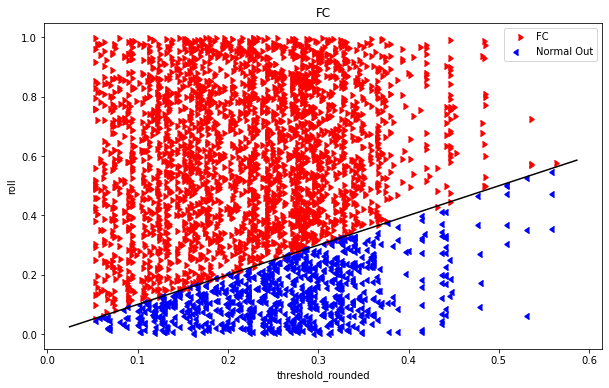

In [8]:
dfc["threshold_rounded"] = 0.05 + 0.25 * dfc["batter_martyrdom"]

# dfc["threshold"] = -intercept_scaled[0]
# print(-intercept_scaled)
# for pair in zip(-np.array(coef_list), X.columns):
#     if pair[1] != "roll":
#         print(pair)
#         dfc["threshold"] += pair[0] * dfc[pair[1]]

# x_val = "day"
x_val = "threshold_rounded"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(
    dfc[~dfc["passed"]][x_val],
    dfc[~dfc["passed"]]["roll"],
    color="red",
    label="FC",
    marker=CARETRIGHTBASE,
)
ax.scatter(
    dfc[dfc["passed"]][x_val],
    dfc[dfc["passed"]]["roll"],
    color="blue",
    label="Normal Out",
    marker=CARETLEFTBASE,
)
ax.set_xlabel(x_val)
ax.set_ylabel("roll")
ax.set_title("FC")
# ax.set_xlim(0.484, 0.499)
# ax.set_ylim(-1e-2, 1e-2)
# ax.grid()

ax.plot(ax.get_xlim(), ax.get_xlim(), "k")

ax.legend()

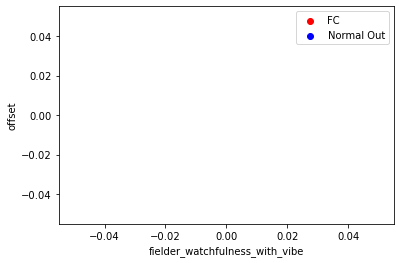

In [9]:
dfc["offset"] = dfc["roll"] - dfc["threshold_rounded"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "fielder_watchfulness_with_vibe"
ax.scatter(
    outliers[~outliers["passed"]][x_val],
    outliers[~outliers["passed"]]["offset"],
    color="red",
    label="FC",
)
ax.scatter(
    outliers[outliers["passed"]][x_val],
    outliers[outliers["passed"]]["offset"],
    color="blue",
    label="Normal Out",
)
ax.set_xlabel(x_val)
ax.set_ylabel("offset")
ax.legend()

In [11]:
table = outliers
print(len(table))
table[
    [
        "offset",
        "roll",
        "threshold_rounded",
        "event_type",
        "baserunner_count",
        "top_of_inning",
        "inning",
        "event_type",
        "batter_vibes",
        # "pitcher_vibes",
        # "ballpark_viscosity",
        "batter_martyrdom",
        "batter_name",
        "batter_multiplier",
        # "pitcher_name",
        "batter_mods",
        # "pitcher_mods",
        "batting_team_mods",
        # "pitching_team_mods",
        "season",
        "day",
        "game_id",
        "play_count",
    ]
].sort_values("offset", ascending=False)
# len(table)

0


,offset,roll,threshold_rounded,event_type,baserunner_count,top_of_inning,inning,event_type,batter_vibes,batter_martyrdom,batter_name,batter_multiplier,batter_mods,batting_team_mods,season,day,game_id,play_count


In [14]:
# list(df.columns)

In [13]:
dfc['runner_on_first_vibes']

0       0.079041
2      -0.554354
3       0.146833
4       0.427135
5       0.137559
          ...   
5508   -0.001093
5509    0.636946
5510   -0.651912
5514    0.321222
5515    0.929254
Name: runner_on_first_vibes, Length: 3592, dtype: float64